# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: 
"Você precisará analisar o conjunto de dados do desempenho escolar dos estudantes e desenvolver um modelo que preverá a probabilidade de um dado estudante passar, quantificando se uma intervenção é necessária."**
- Conceituação:
    - Classificação (e estimativa de probabilidade) de classes (ou categoria): tenta prever, para cada indivíduo de uma população, a que (pequeno) conjunto de classes este indivíduo pertence. Normalmente, as classes são mutuamente exclusivas (ex: "Sim/Não"; "Aceite/Recusa"; "Doente/Saudável"), caracterizando-se por rótulos "target" discretos).
    - Regressão ("estimativa de valor"): tenta estimar ou prever, para cada indivíduo, o "valor numérico" de alguma variável (ex: "qual será o preço?"; "qual será o volume de vendas?"), caracterizando-se por rótulos "target" contínuos.

**Para o problema em questão (Intervenção para Estudantes) o tipo de aprendizado supervisionado é "Classificação" (ex: "intervenção É necessária" / "intervenção NÃO É necessária").**

** Referências Bibliográficas (Questão 1 - Classificação versus Regressão) **
- Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina / Katti Faceli... [et al.]. - [Reimpr]. - Rio de Janeiro : LTC, 2017.

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
print ("a/c Revisor: Da mesma forma que no projeto Boston Housing, ficarei atento e corrigirei as eventuais diferenças de versão.")

a/c Revisor: Da mesma forma que no projeto Boston Housing, ficarei atento e corrigirei as eventuais diferenças de versão.


**Pacotes utilizados:**

- Pandas - Python Data Analysis Library
    - pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
    http://pandas.pydata.org


- NumPy
    - NumPy is the fundamental package for scientific computing with Python. It contains among other things:
        a powerful N-dimensional array object
        sophisticated (broadcasting) functions
        tools for integrating C/C++ and Fortran code
        useful linear algebra, Fourier transform, and random number capabilities
        http://www.numpy.org/


- Matplotlib
    - Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.
    https://matplotlib.org/


- Seaborn: Statistical Data Visualization
    - Seaborn is a Python visualization library based on matplotlib.
    It provides a high-level interface for drawing attractive statistical graphics.
    https://seaborn.pydata.org/

In [2]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
#...the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
#http://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

In [3]:
# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print ("Os dados dos estudantes foram lidos com êxito!")

Os dados dos estudantes foram lidos com êxito!


In [4]:
print ("Conhecendo melhor o DataSet...")

Conhecendo melhor o DataSet...


In [5]:
# listando as colunas
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

** O conjunto de dados possui os seguintes atributos: **

- school : escola do estudante (binário: "GP" ou "MS")
- sex : sexo do estudante (binário: "F" - feminino ou "M" - masculino)
- age : idade do estudante (numérico: de 15 a 22)
- address : tipo de endereço do estudante (binário: "U" - urbano ou "R" - rural)
- famsize : tamanho da família (binário: "LE3" - até 3 pessoas ou "GT3" - mais de 3)
- Pstatus : situação de coabitação parental (binário: "T" - vivendo juntos ou "A" - separados)
- Medu : nível de escolaridade da mãe (numérico: 0 - nenhum, 1 - educação primária (até quarto ano), 2 - quinto a nono ano, 3 - ensino médio ou 4 - educação superior)
- Fedu : nível de escolaridade do pai (numérico: 0 - nenhum, 1 - educação primária (até quarto ano), 2 - quinto a nono ano, 3 - ensino médio ou 4 - educação superior)
- Mjob : profissão da mãe (nominal: "teacher" (professora), "health" (relacionado à saúde), "services" (ex. cargo administrativo ou policial), "at_home" (de casa) ou "other" (outros))
- Fjob : profissão do pai (nominal: "teacher" (professor), "health" (relacionado à saúde), "services" (ex. cargo administrativo ou policial), "at_home" (de casa) ou "other" (outros))
- reason : razão para escolher a escola (nominal: "home" (proximidade), "reputation" (reputação), "course" (preferência do curso) ou "other" (outro))
- guardian : responsável pelo estudante (nominal: "mother" (mãe), "father" (pai) ou "other" (outro))
- traveltime : tempo do trajeto casa-escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora)
- studytime : tempo semanal de estudo (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)
- failures : número de reprovações passadas (numérico: n se 1<=n<3, senão 4)
- schoolsup : suporte educacional extra (binário: sim ou não)
- famsup : suporte educacional familiar (binário: sim ou não)
- paid : classes pagas extras dentre as matérias curriculares (Matemática ou Português) (binário: sim ou não)
- activities : atividades extra-curriculares (binário: sim ou não)
- nursery : frequentou educação infantil (binário: sim não)
- higher : pretende cursar educação superior (binário: sim ou não)
- internet : Acesso à internet em casa (binário: sim ou não)
- romantic : em um relacionamento afetivo (binário: sim ou não)
- famrel : qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)
- freetime : tempo livre depois da escola (numérico: de 1 - muito baixo a 5 - muito alto)
- goout : frequência de saída com os amigos (numérico: de 1 - muito baixa a 5 - muito alta)
- Dalc : consumo de álcool durante dias úteis (numérico: de 1 - muito baixo a 5 - muito alto)
- Walc : consumo de álcool durante os fins de semana (numérico: de 1 - muito baixo a 5 - muito alto)
- health : estado atual de saúde (numérico: de 1 - muito ruim a 5 - muito bom)
- absences : número de faltas na escola (numérico: de 0 a 93)
- passed : se o estudante passou no exame final (binário: sim ou não)

In [6]:
# listando os dados do início do dataset
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [7]:
# dimensões (linhas x colunas)
student_data.shape

(395, 31)

In [8]:
# listando os dados do final do dataset
student_data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [9]:
# informações gerais sobre o dataset
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [10]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [11]:
student_data.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,yes
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,265


In [12]:
# verificação de nulls
student_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [13]:
# TODO: Calcule o número de estudantes
n_students = student_data.shape[0]

# TODO: Calcule o número de atributos
n_features = student_data.shape[1]-1

# TODO: Calcule o número de alunos aprovados
n_passed = student_data.passed.value_counts()['yes']

# TODO: Calcule o número de alunos reprovados
n_failed = n_students-n_passed

# TODO: Calcule a taxa de graduação
grad_rate = float(n_passed)*100/n_students

# Imprima os resultados
print ("Número total de estudantes: {}".format(n_students))
print ("Número de atributos: {}".format(n_features))
print ("Número de estudantes aprovados: {}".format(n_passed))
print ("Número de estudantes reprovados: {}".format(n_failed))
print ("Taxa de graduação: {:.2f}%".format(grad_rate))

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [14]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print ("Colunas de atributos:\n{}".format(feature_cols))
print ("\nColuna-alvo: {}".format(target_col))

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print ("\nFeature values:")
print (X_all.head())

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [15]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


** a/c Revisor: optei por fazer algumas análises a mais, no Conjunto de Dados como um todo e também  na nossa variável "Target" **

**Analisando nossa 'Coluna-alvo: passed'**
- ** Obs: usando uma variável "temp" para não comprometer o código original **

In [16]:
y_all_temp = y_all
print (y_all_temp.head())

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object


In [17]:
print (y_all_temp.tail())

390     no
391    yes
392     no
393    yes
394     no
Name: passed, dtype: object


In [18]:
print (y_all_temp.describe())

count     395
unique      2
top       yes
freq      265
Name: passed, dtype: object


In [19]:
# conversão para 0/1 visando análise de proporção
y_all_temp = (y_all_temp == 'yes').astype(int)

print("Passed = yes (classe 1): {}".format(y_all_temp.value_counts()[1]))
print("Passed = no (classe 0): {}".format(y_all_temp.value_counts()[0]))

#verificação
y_all_temp.value_counts()

Passed = yes (classe 1): 265
Passed = no (classe 0): 130


1    265
0    130
Name: passed, dtype: int64

In [20]:
print (y_all_temp.head())
print (y_all_temp.tail())
print (y_all_temp.describe())

0    0
1    0
2    1
3    1
4    1
Name: passed, dtype: int64
390    0
391    1
392    0
393    1
394    0
Name: passed, dtype: int64
count    395.000000
mean       0.670886
std        0.470487
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: passed, dtype: float64


Proporção passed = no, Classe 0: 32.91139240506329%
Proporção passes = yes, Classe 1: 67.0886075949367%


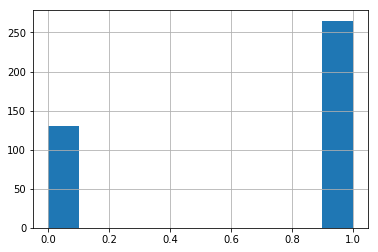

In [21]:
# analisando a proporção de passed (yes/no)

print("Proporção passed = no, Classe 0: {}%".format(100*y_all_temp.value_counts()[0]/len(y_all_temp)))

print("Proporção passes = yes, Classe 1: {}%".format(100*y_all_temp.value_counts()[1]/len(y_all_temp)))

y_all_temp.hist()

plt.show()

** Análise de correlações: **
** usaremos o DataSet original para não impactar os subconjuntos já preparados.**

In [22]:
student_data = preprocess_features(student_data)

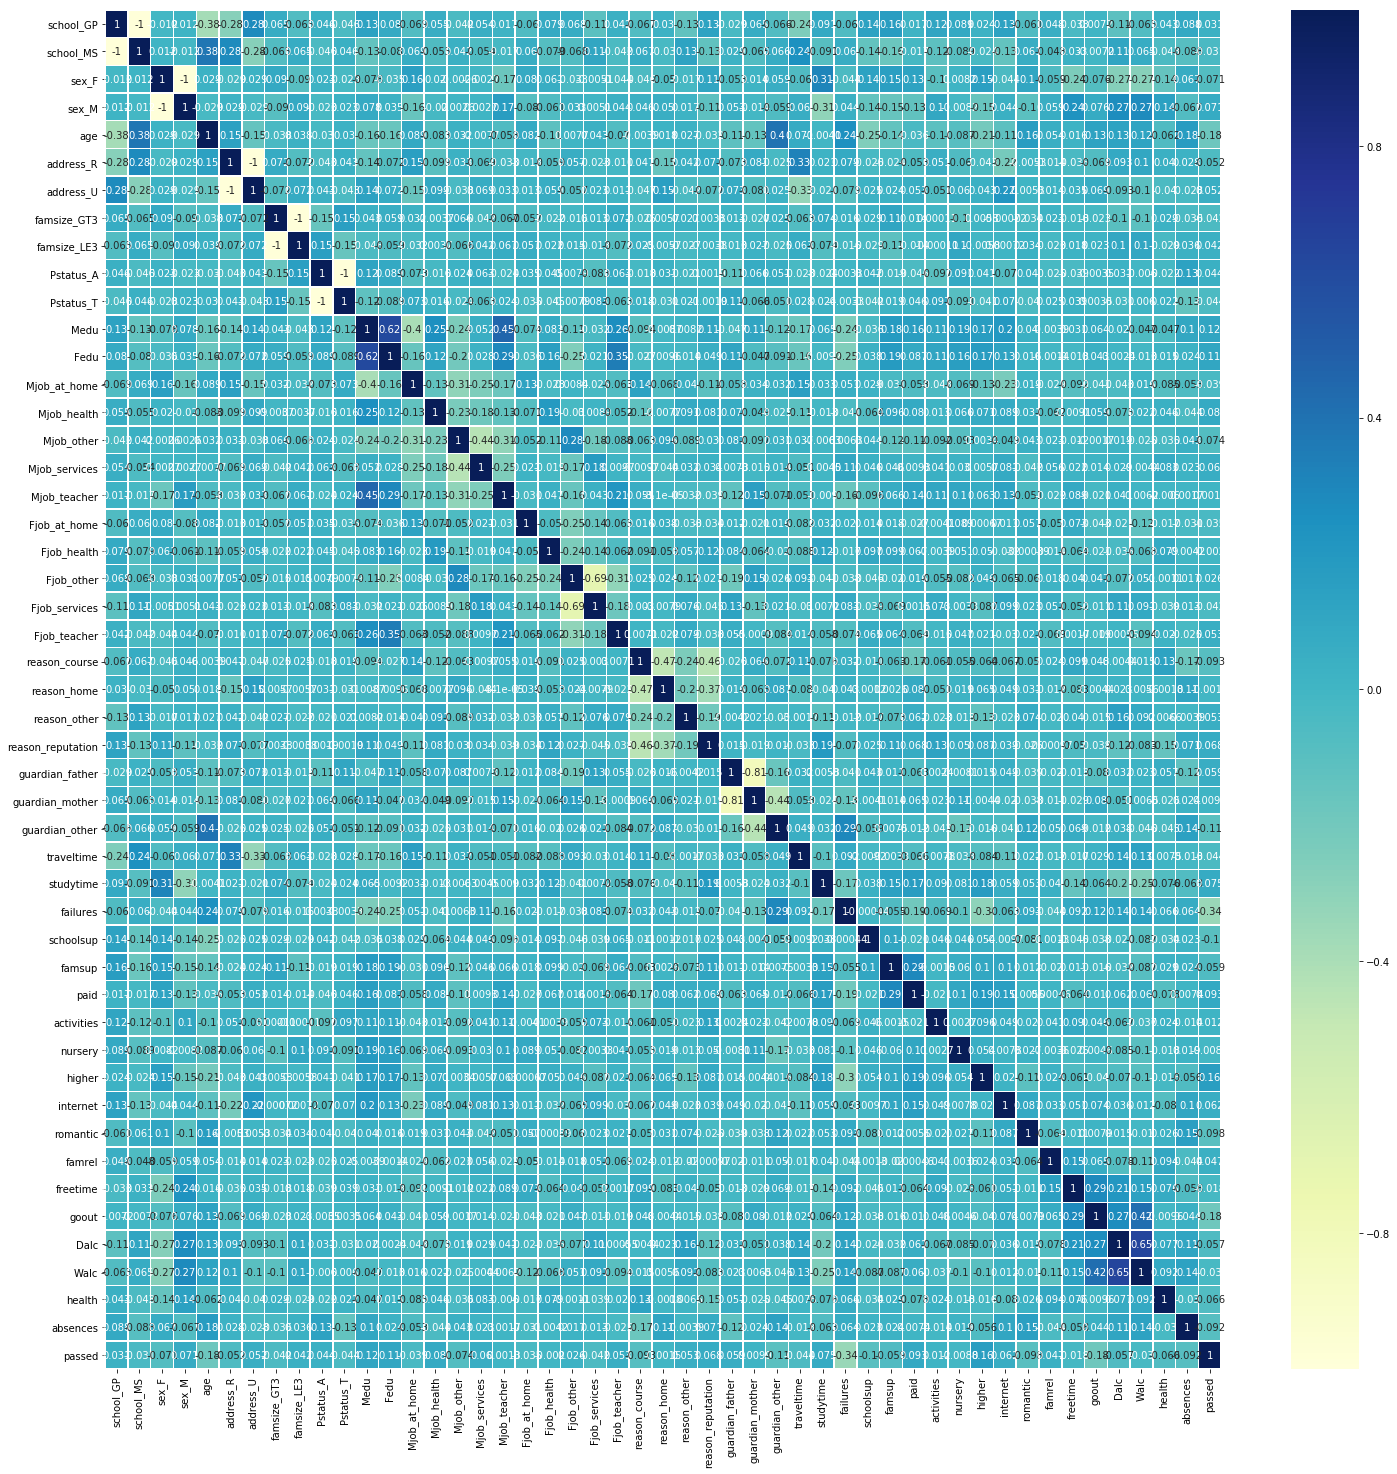

In [23]:
# Analisando correlações (visualização com números) através do mapa de calor.

fig, ax = plt.subplots(figsize=(25,25))
col_corr = student_data.corr()
sns.heatmap(col_corr, annot=True, linewidths=.5, cmap="YlGnBu")

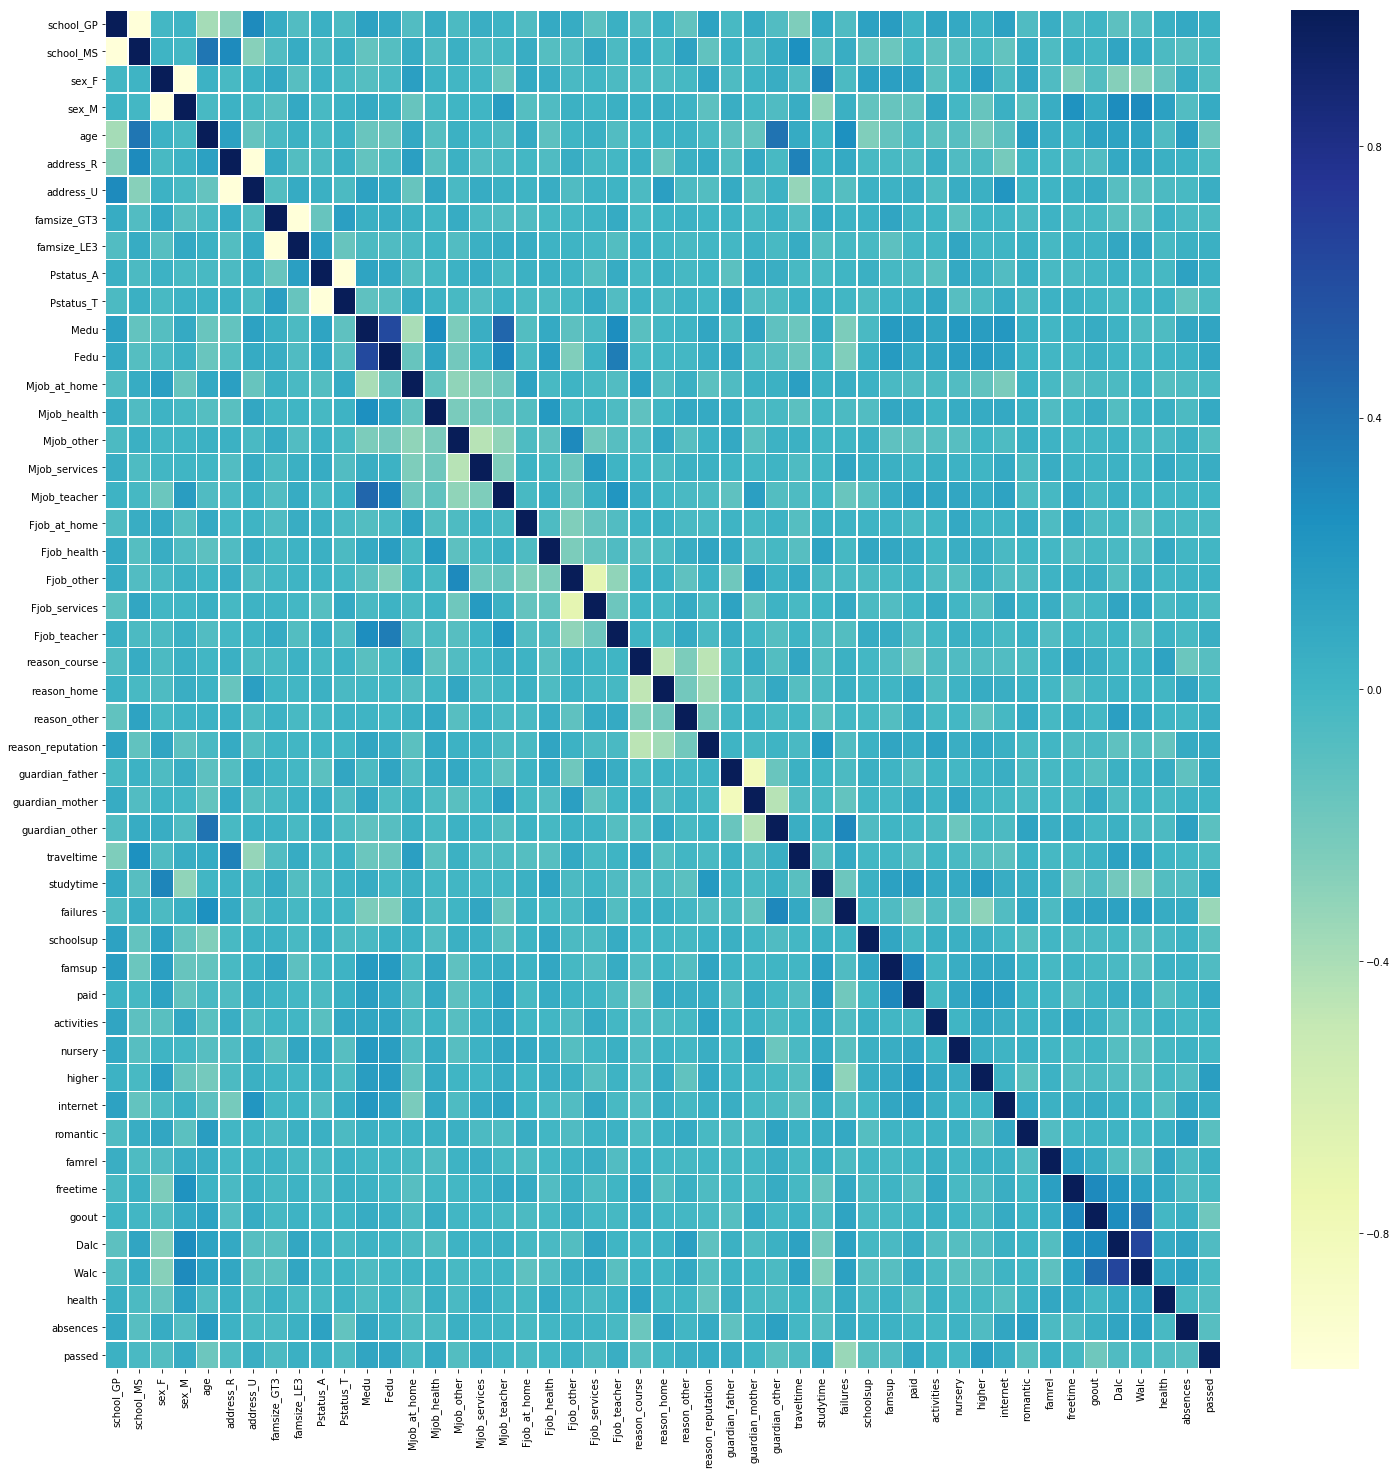

In [24]:
# Analisando correlações (visualização sem números) através do mapa de calor.

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(col_corr, annot=False, linewidths=.5, cmap="YlGnBu")

** Nota: Analisando as classes "passed" (target), não verificamos uma correlação significativa (ou forte), seja positiva ou negativa (1 ou -1) com as demais Features individualmente (vide na visualização: a útima linha ou a última coluna à direita).**

Interpretação do coeficiente de correlação ( r ):

- O valor de  r  está sempre entre  −1  e  +1 , com  r=0  correspondendo à não associação.
    - Valor positivo: diretamente proporcional
    - Valor negativo: inversamente proporcional
    
- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.    

https://pt.wikipedia.org/wiki/Coeficiente_de_correlação_de_Pearson

### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [25]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
#http://scikit-learn.org/stable/modules/cross_validation.html
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
#X_train = None
#X_test = None
#y_train = None
#y_test = None
seed = 2018
X_train, X_test, y_train, y_test = train_test_split(X_all, 
                                                    y_all, 
                                                    train_size=num_train, 
                                                    test_size=num_test, 
                                                    random_state=seed, 
                                                    shuffle=True)

# Mostre o resultado da distribuição
print ("O conjunto de treinamento tem {} amostras.".format(X_train.shape[0]))
print ("O conjunto de teste tem {} amostras.".format(X_test.shape[0]))

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: **

** Considerações iniciais: **

**- A respeito do dados:**
    - pequeno volume de dados;
    - de acordo com o mapa de calor, as features não demonstraram correlação relevante entre si;
    - a proporção encontrada na nossa variável target (aproximadamente 2 para 1), podendo com isso gerar um viés na predição;
    - a dimensionalidade final (48 features) pode impactar determinados modelos de classificadores;

**- A respeito da tarefa a ser realizada:**

    - predição por classificação;
    - tempo de treinamento (custo da tarefa) pode ser fator determinante, dado o ambiente em que será executado (escolas) e também ao fato de que aqui temos uma amostra de dados. Em um ambiente escolar real, teremos uma quantidade bem maior;

**- A respeito das escolhas técnicas:**
    - optamos por nos guiar através das referências:
        - "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina[1]"
        - "scikit-learn - Machine Learning in Python[2]"

**- A respeito da área de negócio envolvida ("Dados Educacionais"):**
    - optamos por referenciar, dentre outros, os trabalhos correlacionados realizados em:
        - "Mineração de Dados Educacionais: Conceitos, Técnicas, Ferramentas e Aplicações[3]"
        - "Tratamento Temporal Em Mineração De Dados Educacionais Para Fidelização De Estudantes[4]".
        - "Classifiers for educational technology[5]"
- Obs: vide a seção Referências Bibliográficas mais abaixo.

** Obs: Visando deixar aqui uma proposta de discussão e, pela similaridade dos trabalhos, reproduzimos aqui a "Tabela de Comparação de Modelos de Classificação" apresentada em "Tratamento Temporal Em Mineração De Dados Educacionais Para Fidelização De Estudantes[4]" (apud "Classifiers for educational technology[5]"):**

** Comparação de diferentes paradigmas de classificação utilizados em outros trabalhos com Dados Educaionais. **

O sinal “+” indica que o método oferece suporte à propriedade, “-” que não oferece suporte.

In [26]:
#https://pypi.org/project/tabulate/
#Pretty-print tabular data in Python, a library and a command-line utility.
from IPython.display import HTML, display
import tabulate

headers=["", "Árvore de Decisão", "Naive Bayes", "Bayesianos em Geral", "Redes Neurais", "K-NN", "SVM"]

table = [
["Fronteiras não lineares", "+", "+", "+", "+", "+", "+"],
["Acurácia em pequenos conjuntos de dados_resultado", "-", "+", "+/-", "-", "-", "+"],
["Trabalha com dados incompletos", "-", "+", "+", "+", "+", "-"],
["Suporta variáveis mistas", "+", "+", "+", "-", "+", "-"],
["Interpretação natural", "+", "+", "+", "-", "+", "-"],
["Raciocínio eficiente", "+", "+", "+", "+", "-", "+"],
["Aprendizado eficiente", "+/-", "+", "-", "-", "+/-", "+"],
["Atualização eficiente", "-", "+", "+", "+", "+", "-"]
]

display(HTML(tabulate.tabulate(table, headers, tablefmt='html', stralign="center")))

,Árvore de Decisão,Naive Bayes,Bayesianos em Geral,Redes Neurais,K-NN,SVM
Fronteiras não lineares,+,+,+,+,+,+
Acurácia em pequenos conjuntos de dados_resultado,-,+,+/-,-,-,+
Trabalha com dados incompletos,-,+,+,+,+,-
Suporta variáveis mistas,+,+,+,-,+,-
Interpretação natural,+,+,+,-,+,-
Raciocínio eficiente,+,+,+,+,-,+
Aprendizado eficiente,+/-,+,-,-,+/-,+
Atualização eficiente,-,+,+,+,+,-


** Modelo 1: Support Vector Machines (SVM)**

- Aplicação: 
    - "Mineração de Dados Educacionais: Conceitos, Técnicas, Ferramentas e Aplicações[3]"
    - "Tratamento Temporal Em Mineração De Dados Educacionais Para Fidelização De Estudantes[4]".
    - "Classifiers for educational technology[5]"


- Vantagens:
    - Com princípios embasados na teoria de aprendizado estístico, as SVMs caracterizam-se por apresentar uma boa capacidade de generalização.
    - Convexidade do problema de otimização formulado em seu treinameto, que implica a existência de um único mínimo global.
    - Eficaz em espaços dimensionais elevados (sendo ainda eficaz nos casos em que o número de dimensões é maior que o número de amostras).
    - O uso de funções kernel na não linearização das SVMs torna o algoritmo eficiente, pois permite a construção de simples hiperplanos em um espaço de alta dimensão de forma tratável do ponto de vista computacional.
    - Usa um subconjunto de pontos de treinamento na função de decisão (chamados vetores de suporte), portanto, também é eficiente em termos de memória.
    - Versátil: diferentes funções do Kernel podem ser especificadas para a função de decisão. Os kernels comuns são fornecidos, mas também é possível especificar kernels customizados.


- Desvantagens:
    - Alta sensibilidade à escolha de valores de parâmetros.
    - Dificuldade de interpretação do modelo gerado.
    - As máquinas de vetores de suporte são ferramentas poderosas, mas seus requisitos de computação e armazenamento aumentam rapidamente com o número de vetores de treinamento.    
    - As SVMs não fornecem estimativas de probabilidade diretamente, elas são calculadas usando a validação cruzada.


- Adequação ao problema proposto:
    - O conjunto de vantagens exposto acima justifica a sua utilização neste trabalho, dado por exemplo o volume de dados disponível para treino/teste e o número de dimensões do conjunto de dados.
    

- Link no scikit-learn: http://scikit-learn.org/stable/modules/svm.html

** Modelo 2: Naive Bayes Gaussiano (GaussianNB) **

- Aplicação: 
    - "Mineração de Dados Educacionais: Conceitos, Técnicas, Ferramentas e Aplicações[3]"
    - "Tratamento Temporal Em Mineração De Dados Educacionais Para Fidelização De Estudantes[4]".
    - "Classifiers for educational technology[5]"


- Vantagens:
    - Computacionalmente rápido.
    - Simples de implementar.
    - Funciona bem com altas dimensões.
    - Boa resistência a dados ausentes e ruidosos.
    - Treinamento incremental.
    

- Desvantagens:
    - Depende da suposição de independência e terá um desempenho ruim se essa suposição não for cumprida.
    - Só obtemos a classe com a maior probabilidade e nada diz em termos de suas características. Ou seja, não recebemos nenhuma informação sobre a estrutura dos dados que estão sendo analisados


- Adequação ao problema proposto:
    - Justifica-se a utilização neste trabalho, por exemplo, o número de dimensões e o baixo custo computacional.
    
    
- Link no scikit-learn: http://scikit-learn.org/stable/modules/naive_bayes.html / http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

** Modelo 3: Decision Trees (DTs) **

- Aplicação: 
    - "Mineração de Dados Educacionais: Conceitos, Técnicas, Ferramentas e Aplicações[3]"
    - "Tratamento Temporal Em Mineração De Dados Educacionais Para Fidelização De Estudantes[4]".
    - "Classifiers for educational technology[5]"


- Vantagens:
    - Simples de entender e interpretar. Árvores podem ser visualizadas.
    - Requer pouca preparação de dados. 
    - O custo de usar a árvore (ou seja, prever dados) é logarítmico no número de pontos de dados usados para treinar a árvore.
    - Capaz de lidar com dados numéricos e categóricos. Outras técnicas são geralmente especializadas na análise de conjuntos de dados que possuem apenas um tipo de variável.
    - Capaz de lidar com problemas de várias saídas.
    - Usa um modelo de caixa branca. Se uma determinada situação é observável em um modelo, a explicação para a condição é facilmente explicada pela lógica booleana. 
    - Possível validar um modelo usando testes estatísticos. Isso torna possível explicar a confiabilidade do modelo.
    - Funciona bem, mesmo que suas suposições sejam de algum modo violadas pelo verdadeiro modelo do qual os dados foram gerados.


- Desvantagens:
    - Podem criar árvores complexas que não generalizam bem os dados.
    - As árvores de decisão podem ficar instáveis porque pequenas variações nos dados podem resultar na geração de uma árvore completamente diferente.
    - O problema de aprender uma árvore de decisão ótima existe sob vários aspectos de otimalidade e até mesmo para conceitos simples. Consequentemente, os algoritmos práticos de aprendizagem da árvore de decisão são baseados em algoritmos heurísticos, como o algoritmo guloso, em que decisões locais ótimas são tomadas em cada nó. Tais algoritmos não podem garantir o retorno da árvore de decisão ótima globalmente.
    - Existem conceitos que são difíceis de aprender porque as árvores de decisão não as expressam facilmente, como problemas de XOR, paridade ou multiplexadores.
    - Pode-se gerar árvores tendenciosas se algumas classes dominam.


- Adequação ao problema proposto:
    - Sua utilização é justificada, por exemplo, (e neste caso, especialmente) pela transparência na interpretação dos resultados, tornando-se sua adoção mais simples; a eficiência em tempo de execução; o fato de lidar bem com dados numéricos e categóricos (é o caso específico do nosso problema).
    
    
- Link no scikit-learn: http://scikit-learn.org/stable/modules/tree.html / http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

** Referências Bibliográficas (Questão 2 - Aplicação dos Modelos) **
- [1] Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina / Katti Faceli... [et al.]. - [Reimpr]. - Rio de Janeiro : LTC, 2017.
- [2] scikit-learn - Machine Learning in Python
    - Supervised learning - Disponível em: http://scikit-learn.org/stable/supervised_learning.html
    - Tutorials - Choosing the right estimator - Disponível em: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
    - Classifier comparison - Disponível em: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
- [3] Mineração de Dados Educacionais: Conceitos, Técnicas, Ferramentas e Aplicações
Anais da Jornada de Atualização em Informática na Educação - 
Jornada de Atualização em Informática na Educação - JAIE 2012 - 
Autores: Evandro Costa, Ryan S.J.d. Baker, Lucas Amorim, Jonathas Magalhães, Tarsis Marinho - 
Disponível em: http://www.br-ie.org/pub/index.php/pie/article/view/2341
- [4] Tratamento Temporal Em Mineração De Dados Educacionais Para Fidelização De Estudantes - Autor: Kleyton Fazolin - 
Curitiba PR - 2017 - Disponível em: http://repositorio.utfpr.edu.br/jspui/bitstream/1/2883/1/CT_PPGCA_M_Fazolin%2C%20Kleyton_2017.pdf
- [5] Classifiers for educational technology - Autor: Hämäläinen, Wilhelmiina - Helda, University of Helsinki - 2010 - Disponível em: https://helda.helsinki.fi/handle/10138/24369

### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

** Obs 01: apenas do ponto de vista didático, optamos por treinar (dentro do nosso tempo disponível), uma quantidade maior de modelos (visando comparar os resultados), bem como mostrar uma visualização do resultado do processamento.**

** Obs 02: a/c Revisor: optei por fazer ligeira modificação nos métodos acima visando guardar o resutado do processamento para posterior visualização, conforme informado nas "Considerações iniciais da resposta da Questão 2"**

In [27]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print ("O modelo foi treinado em {:.4f} segundos".format(end - start))
    print ("-")
    
    #ligeira modificação do código original visando guardar o resultado do processamento para posterior visualização
    tempo_treino = end - start
    return tempo_treino

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print ("As previsões foram feitas em {:.4f} segundos.".format(end - start))
    print ("-")
    
    #ligeira modificação do código original visando guardar o resultado do processamento para posterior visualização
    tempo_estimativa_aux = end - start
    f1_score_aux = f1_score(target.values, y_pred, pos_label='yes')
    
    return (f1_score_aux, tempo_estimativa_aux)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    print ("--------------------------------------------")
    print (clf.__class__.__name__)
    print ("{} - {}:".format(clf.__class__.__name__, len(X_train)))
        # Indica o tamanho do classificador e do conjunto de treinamento
    print ("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))
    print ("-")
    
    #ligeira modificação do código original visando guardar o resultado do processamento para posterior visualização
    classificador = clf.__class__.__name__
    tam_conjunto_treino = len(X_train)
    
    # Treina o classificador
    tempo_treino = train_classifier(clf, X_train, y_train)
    
    #ligeira modificação do código original visando guardar o resultado do processamento para posterior visualização
    f1_score_aux, tempo_estimativa_aux = predict_labels(clf, X_train, y_train)
    tempo_estimativa_treino = tempo_estimativa_aux
    f1_score_treino = f1_score_aux
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print ("Pontuação F1 para o conjunto de treino: {:.4f}.".format(f1_score_treino))
    print ("-")
    
    #ligeira modificação do código original visando guardar o resultado do processamento para posterior visualização
    f1_score_aux, tempo_estimativa_aux = predict_labels(clf, X_test, y_test)
    tempo_estimativa_teste = tempo_estimativa_aux
    f1_score_teste = f1_score_aux
    
    print ("Pontuação F1 para o conjunto de teste: {:.4f}.".format(f1_score_teste)) 
    
    #ligeira modificação do código original visando guardar o resultado do processamento para posterior visualização
    dados_resultado = armazena_resultado(tam_conjunto_treino, classificador, tempo_treino, tempo_estimativa_treino, tempo_estimativa_teste, f1_score_treino, f1_score_teste)
    
    print ("--------------------------------------------")
    
    return dados_resultado
    
    
#ligeira modificação do código original visando guardar o resultado do processamento para posterior visualização    
def armazena_resultado(tam_conjunto_treino, classificador, tempo_treino, tempo_estimativa_treino, tempo_estimativa_teste, f1_score_treino, f1_score_teste):
    ''' Armazena o resultado do processamento '''
          
    dados_resultado = {
    'tam_conjunto_treino': tam_conjunto_treino,
    'classificador': classificador,
    'tempo_treino': tempo_treino,
    'tempo_estimativa_treino': tempo_estimativa_treino,
    'tempo_estimativa_teste': tempo_estimativa_teste,
    'f1_score_treino': f1_score_treino,
    'f1_score_teste':f1_score_teste
    }
    
    return dados_resultado

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [28]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
# from sklearn import model_A
# from sklearn import model_B
# from skearln import model_C
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier


# TODO: Inicialize os três modelos
#clf_A = None
#clf_B = None
#clf_C = None

seed = 2018
clf_A = LogisticRegression(random_state = seed)
clf_B = DecisionTreeClassifier(random_state = seed)
clf_C = SVC()
clf_D = GaussianNB()
clf_E = neighbors.KNeighborsClassifier()
clf_F = RandomForestClassifier(random_state=seed)
clf_G = ensemble.AdaBoostClassifier(random_state=seed)
clf_H = ensemble.GradientBoostingClassifier(random_state=seed)
clf_I = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=seed)
clf_J = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=seed)
clf_L = SGDClassifier(loss="hinge", penalty="l2")

# TODO: Configure os tamanho dos conjuntos de treinamento
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]


# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)

classifiers = [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G, clf_H, clf_I, clf_J, clf_L]
training_sets = [(X_train_100, y_train_100),
                 (X_train_200, y_train_200),
                 (X_train_300, y_train_300)]

In [29]:
#executando os classificadores e armazenando o resultado do processamento para visualização posterior
dados_resultado = []

for classifier in classifiers:
    for X, y in training_sets:
        #print "\n"
        #train_predict(classifier, X, y, X_test, y_test)
        dados_resultado_temp = train_predict(classifier, X, y, X_test, y_test)
        dados_resultado.append(dados_resultado_temp)

# dataframe que guarda o resultado do processamento para posterior visualização
df = pd.DataFrame(dados_resultado)

--------------------------------------------
LogisticRegression
LogisticRegression - 100:
Treinando um LogisticRegression com 100 pontos de treinamento. . .
-
O modelo foi treinado em 0.0034 segundos
-
As previsões foram feitas em 0.0008 segundos.
-
Pontuação F1 para o conjunto de treino: 0.9104.
-
As previsões foram feitas em 0.0005 segundos.
-
Pontuação F1 para o conjunto de teste: 0.7385.
--------------------------------------------
--------------------------------------------
LogisticRegression
LogisticRegression - 200:
Treinando um LogisticRegression com 200 pontos de treinamento. . .
-
O modelo foi treinado em 0.0040 segundos
-
As previsões foram feitas em 0.0031 segundos.
-
Pontuação F1 para o conjunto de treino: 0.8511.
-
As previsões foram feitas em 0.0006 segundos.
-
Pontuação F1 para o conjunto de teste: 0.7273.
--------------------------------------------
--------------------------------------------
LogisticRegression
LogisticRegression - 300:
Treinando um LogisticRegressio

O modelo foi treinado em 0.1109 segundos
-
As previsões foram feitas em 0.0110 segundos.
-
Pontuação F1 para o conjunto de treino: 0.8558.
-
As previsões foram feitas em 0.0078 segundos.
-
Pontuação F1 para o conjunto de teste: 0.7111.
--------------------------------------------
--------------------------------------------
GradientBoostingClassifier
GradientBoostingClassifier - 100:
Treinando um GradientBoostingClassifier com 100 pontos de treinamento. . .
-
O modelo foi treinado em 0.0804 segundos
-
As previsões foram feitas em 0.0010 segundos.
-
Pontuação F1 para o conjunto de treino: 1.0000.
-
As previsões foram feitas em 0.0009 segundos.
-
Pontuação F1 para o conjunto de teste: 0.7121.
--------------------------------------------
--------------------------------------------
GradientBoostingClassifier
GradientBoostingClassifier - 200:
Treinando um GradientBoostingClassifier com 200 pontos de treinamento. . .
-
O modelo foi treinado em 0.1073 segundos
-
As previsões foram feitas em 

/home/joaoluiz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


** a/c Revisor: abaixo faremos algumas visualizações do resultado do processamento **

In [30]:
# dataframe original
df

,classificador,f1_score_teste,f1_score_treino,tam_conjunto_treino,tempo_estimativa_teste,tempo_estimativa_treino,tempo_treino
0,LogisticRegression,0.738462,0.910448,100,0.000517,0.000751,0.003370
1,LogisticRegression,0.727273,0.851064,200,0.000574,0.003079,0.003994
2,LogisticRegression,0.740741,0.842353,300,0.000260,0.000740,0.006077
3,DecisionTreeClassifier,0.655462,1.000000,100,0.000540,0.000625,0.003972
4,DecisionTreeClassifier,0.707692,1.000000,200,0.000474,0.000415,0.004548
5,DecisionTreeClassifier,0.717557,1.000000,300,0.000603,0.000682,0.003898
6,SVC,0.820513,0.844156,100,0.001611,0.001708,0.003308
7,SVC,0.810458,0.880795,200,0.002586,0.003803,0.005383
8,SVC,0.823529,0.873362,300,0.002990,0.008412,0.010442
9,GaussianNB,0.305882,0.516854,100,0.001043,0.001258,0.002754


In [31]:
# dataframe com as colunas reorganizadas
df = df[[
    "tam_conjunto_treino",
    "classificador",
    "tempo_treino",
    "tempo_estimativa_treino",
    "tempo_estimativa_teste",
    "f1_score_treino",
    "f1_score_teste"
    ]]
df

,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
0,100,LogisticRegression,0.003370,0.000751,0.000517,0.910448,0.738462
1,200,LogisticRegression,0.003994,0.003079,0.000574,0.851064,0.727273
2,300,LogisticRegression,0.006077,0.000740,0.000260,0.842353,0.740741
3,100,DecisionTreeClassifier,0.003972,0.000625,0.000540,1.000000,0.655462
4,200,DecisionTreeClassifier,0.004548,0.000415,0.000474,1.000000,0.707692
5,300,DecisionTreeClassifier,0.003898,0.000682,0.000603,1.000000,0.717557
6,100,SVC,0.003308,0.001708,0.001611,0.844156,0.820513
7,200,SVC,0.005383,0.003803,0.002586,0.880795,0.810458
8,300,SVC,0.010442,0.008412,0.002990,0.873362,0.823529
9,100,GaussianNB,0.002754,0.001258,0.001043,0.516854,0.305882


** Analisando "tam_conjunto_treino: 100"**

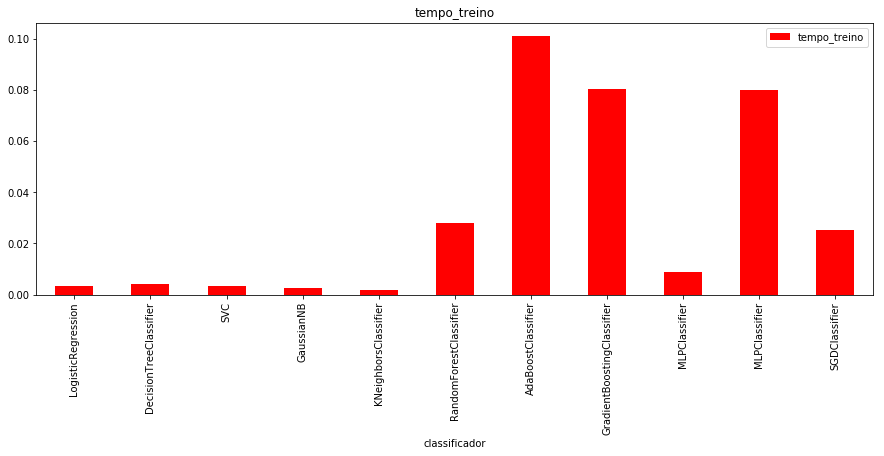

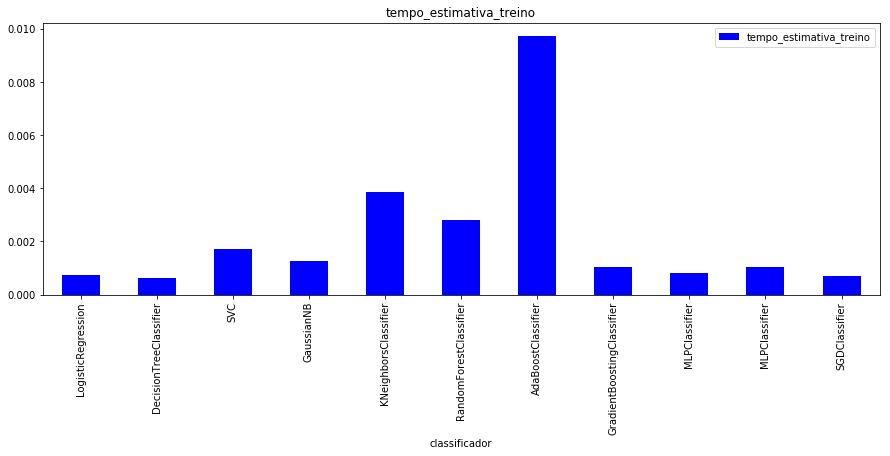

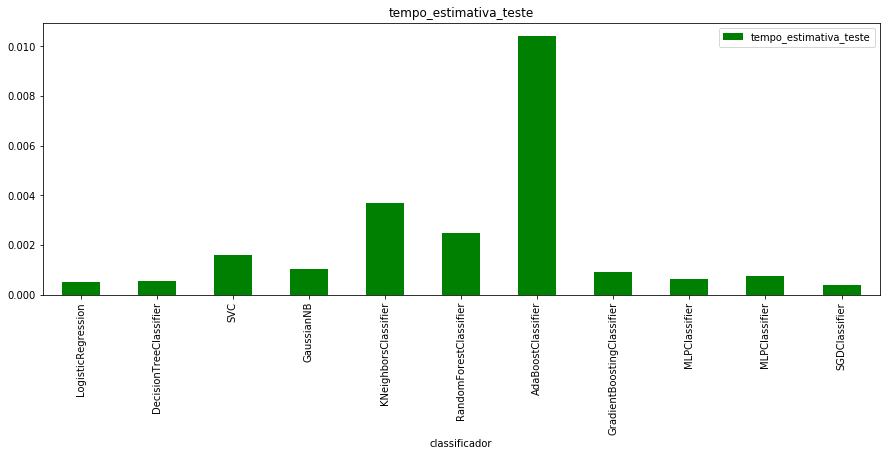

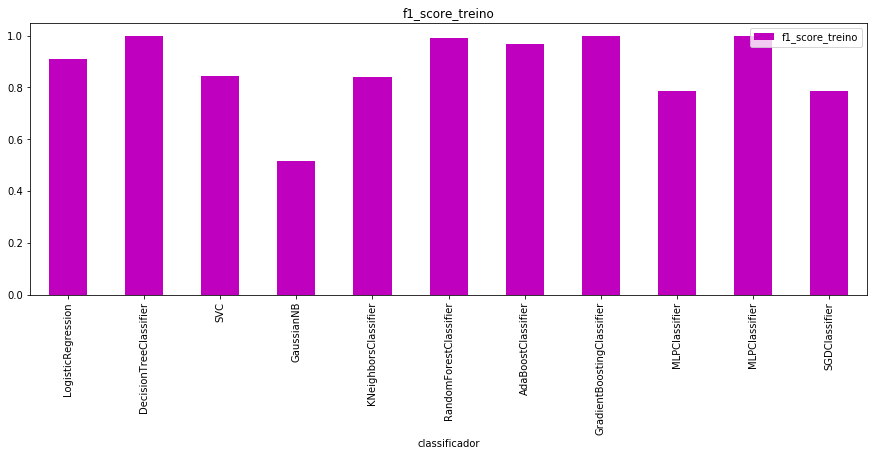

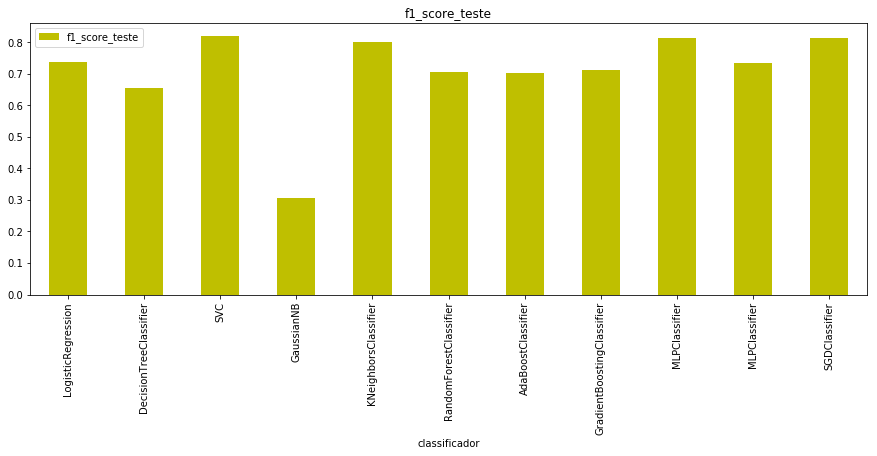

In [32]:
df100 = df[df['tam_conjunto_treino'] == 100]
df100.plot(x='classificador', y='tempo_treino', kind='bar', title='tempo_treino', color='r', figsize=(15,5))
df100.plot(x='classificador', y='tempo_estimativa_treino', kind='bar', title='tempo_estimativa_treino', color='b', figsize=(15,5))
df100.plot(x='classificador', y='tempo_estimativa_teste', kind='bar', title='tempo_estimativa_teste', color='g', figsize=(15,5))
df100.plot(x='classificador', y='f1_score_treino', kind='bar', title='f1_score_treino', color='m', figsize=(15,5))
df100.plot(x='classificador', y='f1_score_teste', kind='bar', title='f1_score_teste', color='y', figsize=(15,5))

In [33]:
df100

,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
0,100,LogisticRegression,0.003370,0.000751,0.000517,0.910448,0.738462
3,100,DecisionTreeClassifier,0.003972,0.000625,0.000540,1.000000,0.655462
6,100,SVC,0.003308,0.001708,0.001611,0.844156,0.820513
9,100,GaussianNB,0.002754,0.001258,0.001043,0.516854,0.305882
12,100,KNeighborsClassifier,0.001621,0.003877,0.003705,0.842105,0.800000
15,100,RandomForestClassifier,0.028072,0.002798,0.002462,0.992248,0.705882
18,100,AdaBoostClassifier,0.101162,0.009747,0.010428,0.968750,0.702290
21,100,GradientBoostingClassifier,0.080417,0.001028,0.000907,1.000000,0.712121
24,100,MLPClassifier,0.008629,0.000830,0.000607,0.787879,0.812500
27,100,MLPClassifier,0.080017,0.001052,0.000741,1.000000,0.732824


** Analisando "tam_conjunto_treino: 200"**

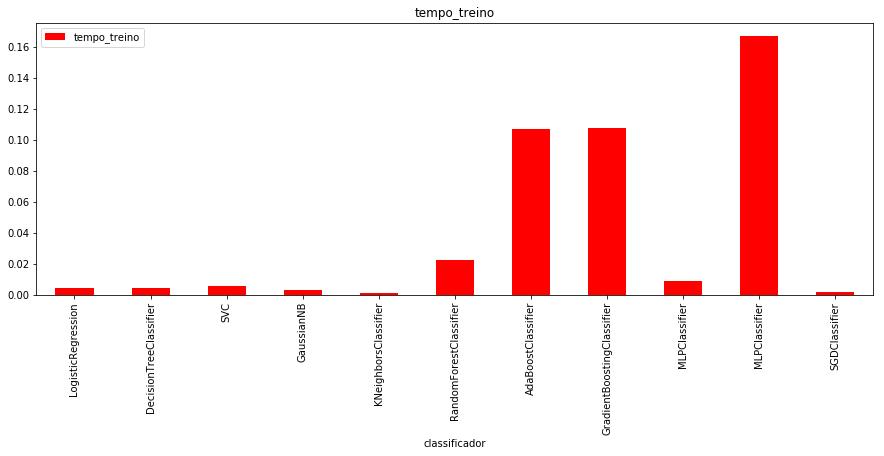

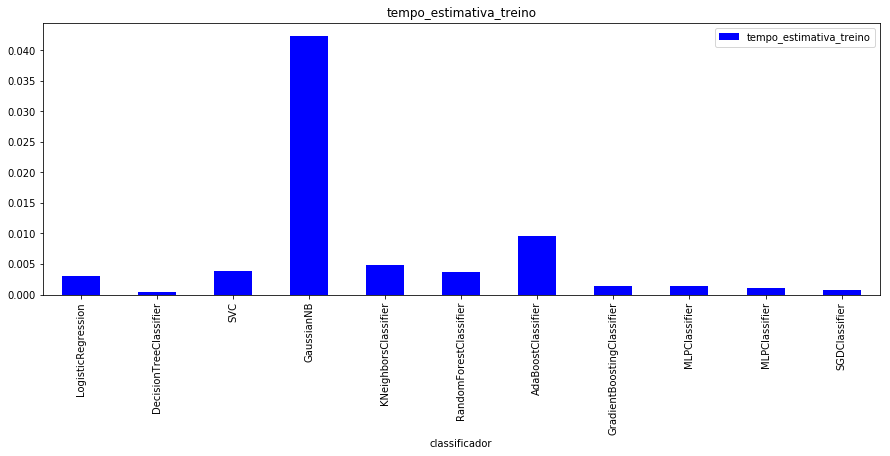

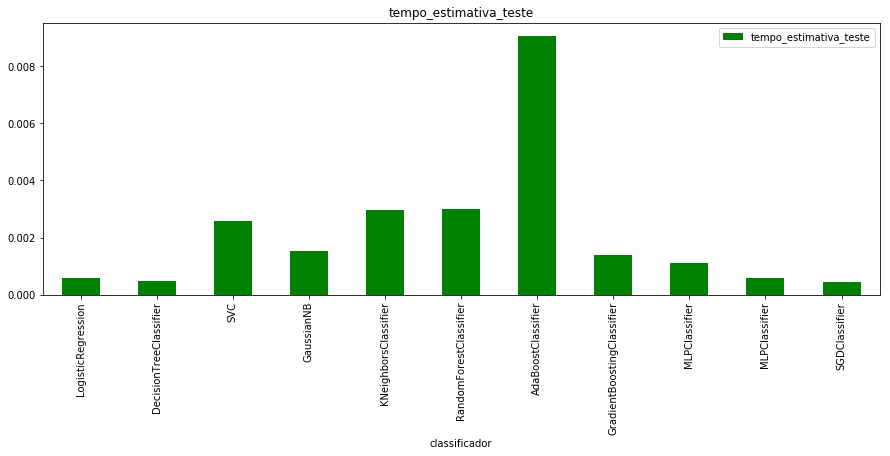

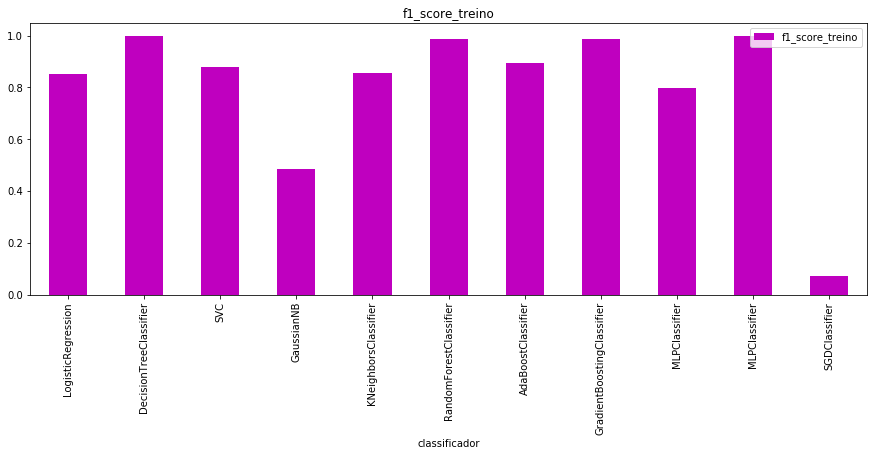

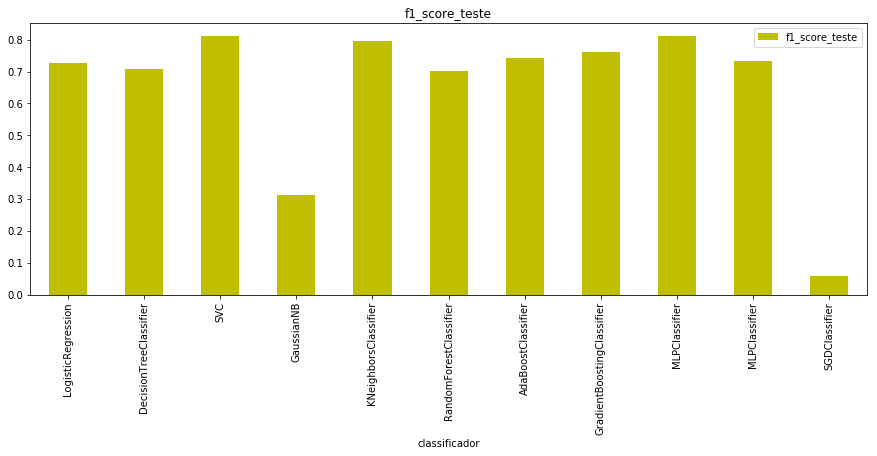

In [34]:
df200 = df[df['tam_conjunto_treino'] == 200]
df200.plot(x='classificador', y='tempo_treino', kind='bar', title='tempo_treino', color='r', figsize=(15,5))
df200.plot(x='classificador', y='tempo_estimativa_treino', kind='bar', title='tempo_estimativa_treino', color='b', figsize=(15,5))
df200.plot(x='classificador', y='tempo_estimativa_teste', kind='bar', title='tempo_estimativa_teste', color='g', figsize=(15,5))
df200.plot(x='classificador', y='f1_score_treino', kind='bar', title='f1_score_treino', color='m', figsize=(15,5))
df200.plot(x='classificador', y='f1_score_teste', kind='bar', title='f1_score_teste', color='y', figsize=(15,5))

In [35]:
df200

,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
1,200,LogisticRegression,0.003994,0.003079,0.000574,0.851064,0.727273
4,200,DecisionTreeClassifier,0.004548,0.000415,0.000474,1.000000,0.707692
7,200,SVC,0.005383,0.003803,0.002586,0.880795,0.810458
10,200,GaussianNB,0.002616,0.042350,0.001517,0.486188,0.313253
13,200,KNeighborsClassifier,0.001310,0.004865,0.002963,0.854237,0.794521
16,200,RandomForestClassifier,0.022340,0.003643,0.003016,0.988764,0.703125
19,200,AdaBoostClassifier,0.106889,0.009510,0.009078,0.892857,0.742424
22,200,GradientBoostingClassifier,0.107274,0.001422,0.001371,0.988848,0.760563
25,200,MLPClassifier,0.008951,0.001368,0.001090,0.798799,0.812500
28,200,MLPClassifier,0.167111,0.001032,0.000569,1.000000,0.732824


** Analisando "tam_conjunto_treino: 300"**

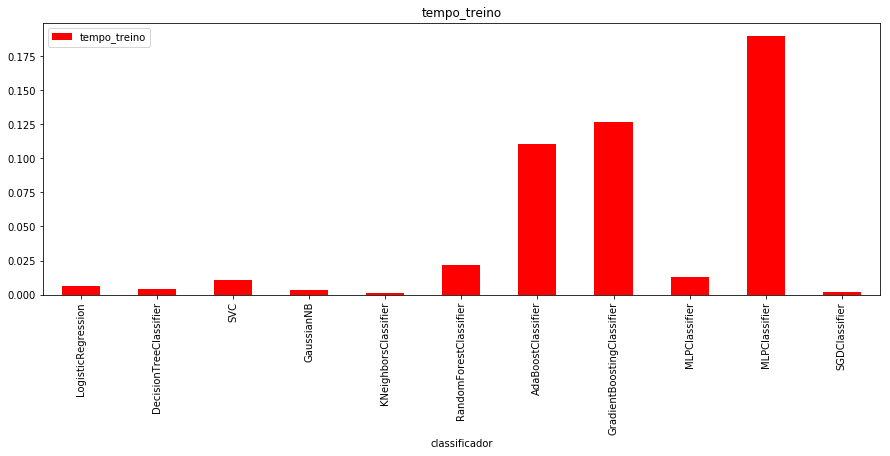

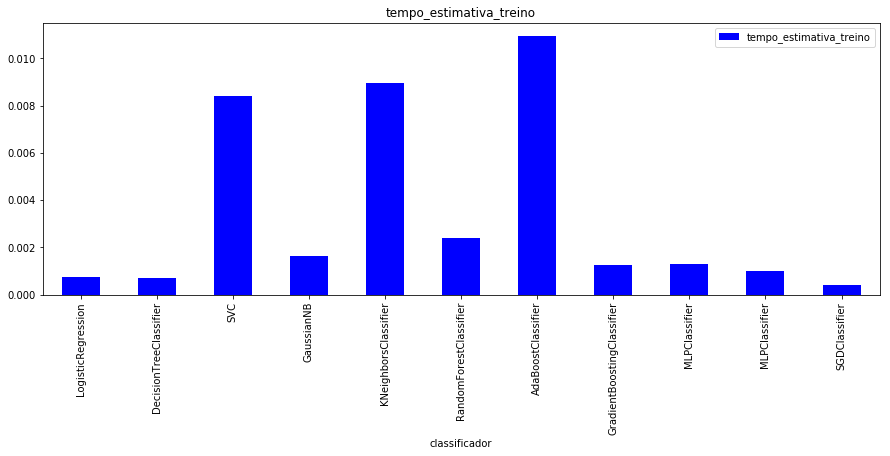

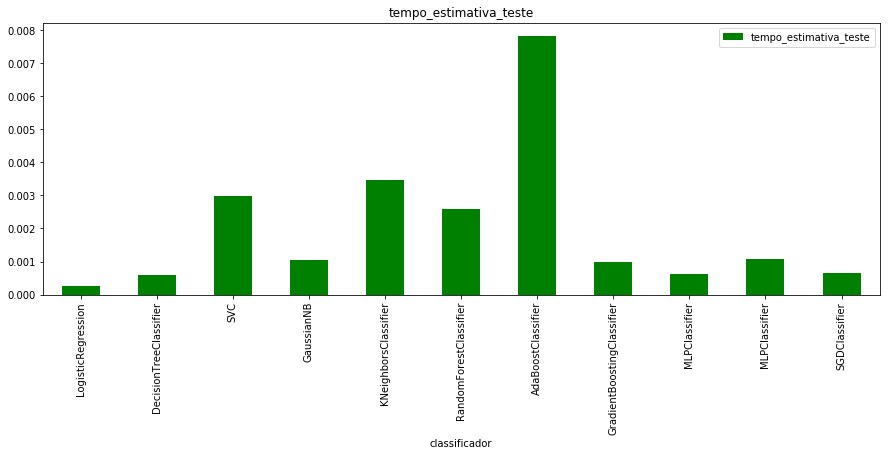

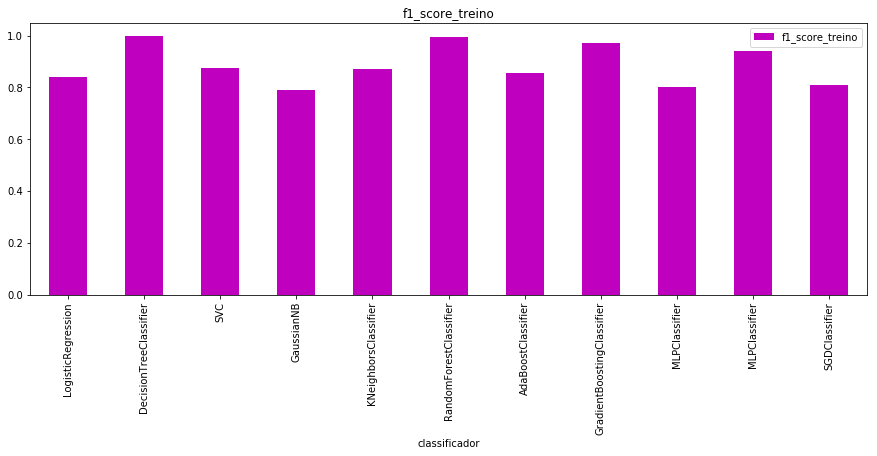

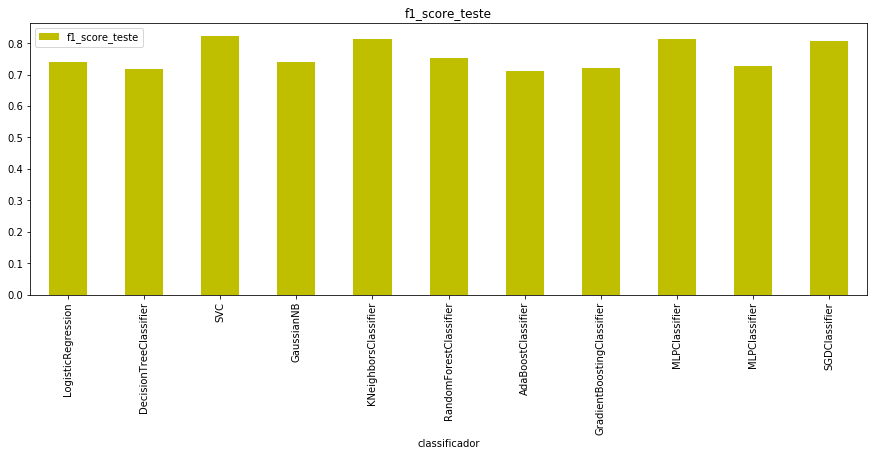

In [36]:
df300 = df[df['tam_conjunto_treino'] == 300]
df300.plot(x='classificador', y='tempo_treino', kind='bar', title='tempo_treino', color='r', figsize=(15,5))
df300.plot(x='classificador', y='tempo_estimativa_treino', kind='bar', title='tempo_estimativa_treino', color='b', figsize=(15,5))
df300.plot(x='classificador', y='tempo_estimativa_teste', kind='bar', title='tempo_estimativa_teste', color='g', figsize=(15,5))
df300.plot(x='classificador', y='f1_score_treino', kind='bar', title='f1_score_treino', color='m', figsize=(15,5))
df300.plot(x='classificador', y='f1_score_teste', kind='bar', title='f1_score_teste', color='y', figsize=(15,5))

In [37]:
df300

,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
2,300,LogisticRegression,0.006077,0.000740,0.000260,0.842353,0.740741
5,300,DecisionTreeClassifier,0.003898,0.000682,0.000603,1.000000,0.717557
8,300,SVC,0.010442,0.008412,0.002990,0.873362,0.823529
11,300,GaussianNB,0.002996,0.001624,0.001039,0.789873,0.738462
14,300,KNeighborsClassifier,0.001470,0.008973,0.003473,0.869565,0.813793
17,300,RandomForestClassifier,0.021986,0.002393,0.002593,0.994975,0.751880
20,300,AdaBoostClassifier,0.110908,0.010955,0.007833,0.855814,0.711111
23,300,GradientBoostingClassifier,0.126906,0.001255,0.000974,0.973236,0.719424
26,300,MLPClassifier,0.012832,0.001312,0.000621,0.800000,0.812500
29,300,MLPClassifier,0.190114,0.001012,0.001075,0.939467,0.725926


### Resultados em tabelas (somente os algoritmos escolhidos)

In [38]:
dfDecisionTreeClassifier = df[df['classificador'] == "DecisionTreeClassifier"]
dfDecisionTreeClassifier

,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
3,100,DecisionTreeClassifier,0.003972,0.000625,0.000540,1.0,0.655462
4,200,DecisionTreeClassifier,0.004548,0.000415,0.000474,1.0,0.707692
5,300,DecisionTreeClassifier,0.003898,0.000682,0.000603,1.0,0.717557


In [39]:
dfDecisionSVC = df[df['classificador'] == "SVC"]
dfDecisionSVC

,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
6,100,SVC,0.003308,0.001708,0.001611,0.844156,0.820513
7,200,SVC,0.005383,0.003803,0.002586,0.880795,0.810458
8,300,SVC,0.010442,0.008412,0.002990,0.873362,0.823529


In [40]:
dfGaussianNB = df[(df['classificador'] == "GaussianNB")]
dfGaussianNB

,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
9,100,GaussianNB,0.002754,0.001258,0.001043,0.516854,0.305882
10,200,GaussianNB,0.002616,0.042350,0.001517,0.486188,0.313253
11,300,GaussianNB,0.002996,0.001624,0.001039,0.789873,0.738462


### Comparando os Resultados em tabelas (somente os algoritmos escolhidos)

In [41]:
classificadores_escolhidos = ["DecisionTreeClassifier", "SVC", "GaussianNB"]

print("Váriavel analisada: f1_score_teste")

f1_score_teste_comparativo = df[df.classificador.isin(classificadores_escolhidos)].sort_values(['tam_conjunto_treino', 'f1_score_teste'])
f1_score_teste_comparativo

Váriavel analisada: f1_score_teste


,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
9,100,GaussianNB,0.002754,0.001258,0.001043,0.516854,0.305882
3,100,DecisionTreeClassifier,0.003972,0.000625,0.000540,1.000000,0.655462
6,100,SVC,0.003308,0.001708,0.001611,0.844156,0.820513
10,200,GaussianNB,0.002616,0.042350,0.001517,0.486188,0.313253
4,200,DecisionTreeClassifier,0.004548,0.000415,0.000474,1.000000,0.707692
7,200,SVC,0.005383,0.003803,0.002586,0.880795,0.810458
5,300,DecisionTreeClassifier,0.003898,0.000682,0.000603,1.000000,0.717557
11,300,GaussianNB,0.002996,0.001624,0.001039,0.789873,0.738462
8,300,SVC,0.010442,0.008412,0.002990,0.873362,0.823529


In [42]:
print("Váriavel analisada: tempo_treino")

tempo_treino_comparativo = df[df.classificador.isin(classificadores_escolhidos)].sort_values(['tam_conjunto_treino', 'tempo_treino'])
tempo_treino_comparativo

Váriavel analisada: tempo_treino


,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
9,100,GaussianNB,0.002754,0.001258,0.001043,0.516854,0.305882
6,100,SVC,0.003308,0.001708,0.001611,0.844156,0.820513
3,100,DecisionTreeClassifier,0.003972,0.000625,0.000540,1.000000,0.655462
10,200,GaussianNB,0.002616,0.042350,0.001517,0.486188,0.313253
4,200,DecisionTreeClassifier,0.004548,0.000415,0.000474,1.000000,0.707692
7,200,SVC,0.005383,0.003803,0.002586,0.880795,0.810458
11,300,GaussianNB,0.002996,0.001624,0.001039,0.789873,0.738462
5,300,DecisionTreeClassifier,0.003898,0.000682,0.000603,1.000000,0.717557
8,300,SVC,0.010442,0.008412,0.002990,0.873362,0.823529


In [43]:
print("Váriavel analisada: tempo_estimativa_teste")

tempo_estimativa_teste_comparativo = df[df.classificador.isin(classificadores_escolhidos)].sort_values(['tam_conjunto_treino', 'tempo_estimativa_teste'])
tempo_estimativa_teste_comparativo

Váriavel analisada: tempo_estimativa_teste


,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
3,100,DecisionTreeClassifier,0.003972,0.000625,0.000540,1.000000,0.655462
9,100,GaussianNB,0.002754,0.001258,0.001043,0.516854,0.305882
6,100,SVC,0.003308,0.001708,0.001611,0.844156,0.820513
4,200,DecisionTreeClassifier,0.004548,0.000415,0.000474,1.000000,0.707692
10,200,GaussianNB,0.002616,0.042350,0.001517,0.486188,0.313253
7,200,SVC,0.005383,0.003803,0.002586,0.880795,0.810458
5,300,DecisionTreeClassifier,0.003898,0.000682,0.000603,1.000000,0.717557
11,300,GaussianNB,0.002996,0.001624,0.001039,0.789873,0.738462
8,300,SVC,0.010442,0.008412,0.002990,0.873362,0.823529


## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: **

**Modelo escolhido: Support Vector Machines (SVM) **

Considerações sobre a escolha:

- Optamos por utilizar a melhor pontuação F1_Score (treino e teste)
- Dados disponíveis: poucos
- Recursos limitados, custo e desempenho: dado que os tempos de treinamento e estimativas não são divergentes ao extremo, estou sugerindo então utilizar o melhor F1_Score, visando maior acertividade de identificação de estudantes para as ações que serão realizadas.

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **

** SVM - Support Vector Machine (Máquina de Vetor de Suporte) **

Descrevemos aqui, de maneira geral, o funcionamento da SVM e como ela realiza o processamento de classificação dos dados que possuímos, nos fornecendo então as estimativas que são calculadas e mostradas neste trabalho.

Uma Máquina de Vetor de Suporte, ou simplesmente SVM, é um algoritmo (conjunto de instruções lógicas para computador), do tipo aprendizado de máquina supervisionado, ou seja, que trabalha com dados previamente rotulados para analisar e predizer dados novos.

O SVM baseia-se na ideia de encontrar uma linha (ou uma superfície) de separação que melhor divida um conjunto de dados em duas classes (exemplo no nosso caso: "intervenção É necessária" / "intervenção NÃO É necessária"), conforme mostrado na figura abaixo:
![title](svm_01.png)
A expressão "Vetor (ou Vetores) de Suporte", que dá nome à técnica, está relacionada aos pontos de dados que estão mais próximos da superfície de separação (tecnicamente chamada de hiperplano), e que dão "suporte" ao funcionamento do algoritmo. Desta forma, se os pontos forem removidos, alteram a posição da superfície de separação, motivo pelo qual podem ser considerados os "elementos críticos" de um determinado conjunto de dados.

Para uma tarefa de classificação (como a que estamos fazendo neste trabalho), podemos deduzir intuitivamente que quanto mais longe os pontos estiverem da superfície de separação, mais confiança é gerada a respeito de se nossos dados estão classificados/separados corretamente ou não. Assim, ao receber novos dados (informações de novos alunos a serem analisadas) o algoritmo poderá decidir melhor em qual lado a nova informação será posicionada.

Esse posicionamento chamado ideal (ou ótimo), para a superfície de separação, apresenta uma distância entre os pontos analisados e a superfície. Essa distância é chamada de "margem". Nosso objetivo então é maximizar a "margem" entre os dados e a superfície de separação. Veja a exemplificação na figura abaixo:
![title](svm_02.png)

Um complicador poderá ocorrer se nossos dados não se estiverem inicialmente "linearmente separáveis" (separáveis por uma linha divisória). Veja o exemplo abaixo:
![title](svm_03.png)

Neste caso, o algoritmo, com a parametrização adequada, consegue transformar o modelo, inicialmente 2-D, em um modelo 3-D e realizar a classificação.
![title](svm_3d.png)

Como agora estamos trabalhando em 3 dimensões (na matemática seriam os nossos eixos X, Y, Z em um gráfico qualquer), a nossa superfície de separação não é mais uma "reta", mas um "plano". 

Obs: A implementação do algoritmo permite mapear e analisar conjuntos de dados em dimesões cada vez maiores, até conseguir uma superfície que consiga separar os dados. Neste caso, embora difícil de visualizar intuitivamente, podemos entender de maneira mais simplista, que, quanto mais "misturados estão os dados", o número de dimensões aumenta, visando resolver o problema.

- Referência: "Support Vector Machines for dummies; A Simple Explanation" - http://blog.aylien.com/support-vector-machines-for-dummies-a-simple/

### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [44]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection  import StratifiedShuffleSplit

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
 }]

# TODO: Inicialize o classificador
clf = SVC()

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação

# visando o ponto de vista didático, optei por testar também usando o parametro "cv".
grid_obj_com_cv = GridSearchCV(clf, parameters, f1_scorer, cv=10)
grid_obj_sem_cv = GridSearchCV(clf, parameters, f1_scorer)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj_com_cv = grid_obj_com_cv.fit(X_train, y_train)
grid_obj_sem_cv = grid_obj_sem_cv.fit(X_train, y_train)

# Get the estimator
clf_com_cv = grid_obj_com_cv.best_estimator_
clf_sem_cv = grid_obj_sem_cv.best_estimator_

In [45]:
#verificando os valores sugeridos pelo estimador
grid_obj_com_cv.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
#verificando os valores sugeridos pelo estimador
grid_obj_sem_cv.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
#realizando o processamento com os parametros calibrados

f1_score_treino_com_cv, tempo_estimativa_treino_com_cv = predict_labels(clf_com_cv, X_train, y_train)
f1_score_teste_com_cv, tempo_estimativa_teste_com_cv = predict_labels(clf_com_cv, X_test, y_test)

f1_score_treino_sem_cv, tempo_estimativa_treino_sem_cv = predict_labels(clf_sem_cv, X_train, y_train)
f1_score_teste_sem_cv, tempo_estimativa_teste_sem_cv = predict_labels(clf_sem_cv, X_test, y_test)

As previsões foram feitas em 0.0074 segundos.
-
As previsões foram feitas em 0.0026 segundos.
-
As previsões foram feitas em 0.0069 segundos.
-
As previsões foram feitas em 0.0026 segundos.
-


In [48]:
# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
#print ("O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train, y_train)))
#print ("O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test, y_test)))

print ("O modelo calibrado (com_cv) tem F1 de {:.4f} no conjunto de treinamento.".format(f1_score_treino_com_cv))
print ("O modelo calibrado (com_cv) tem F1 de {:.4f} no conjunto de teste.".format(f1_score_teste_com_cv))

print ("O modelo calibrado (sem_cv) tem F1 de {:.4f} no conjunto de treinamento.".format(f1_score_treino_sem_cv))
print ("O modelo calibrado (sem_cv) tem F1 de {:.4f} no conjunto de teste.".format(f1_score_teste_sem_cv))

O modelo calibrado (com_cv) tem F1 de 0.8361 no conjunto de treinamento.
O modelo calibrado (com_cv) tem F1 de 0.8158 no conjunto de teste.
O modelo calibrado (sem_cv) tem F1 de 0.8383 no conjunto de treinamento.
O modelo calibrado (sem_cv) tem F1 de 0.8108 no conjunto de teste.


In [49]:
print("Relembrando abaixo o treinamento original, sem nenhum tipo de calibração:")
dfDecisionSVC

Relembrando abaixo o treinamento original, sem nenhum tipo de calibração:


,tam_conjunto_treino,classificador,tempo_treino,tempo_estimativa_treino,tempo_estimativa_teste,f1_score_treino,f1_score_teste
6,100,SVC,0.003308,0.001708,0.001611,0.844156,0.820513
7,200,SVC,0.005383,0.003803,0.002586,0.880795,0.810458
8,300,SVC,0.010442,0.008412,0.002990,0.873362,0.823529


### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: **
- O modelo calibrado (com_cv) tem F1 de 0.8361 no conjunto de treinamento.
- O modelo calibrado (com_cv) tem F1 de 0.8158 no conjunto de teste.


- O modelo calibrado (sem_cv) tem F1 de 0.8383 no conjunto de treinamento.
- O modelo calibrado (sem_cv) tem F1 de 0.8108 no conjunto de teste.

Comparando com os resultados sem a calibração (vide a tabela resgatada acima), podemos perceber que não houve grande diferença nos resultados.

Entendemos que, em oportunidade futura, o processo poderá ser refeito com uma base de dados maior para novas comparações.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.